## 1.1

![caption](hw2.png)

## 1.2

$$h_1=ReLu(w_{11}x_1+w_{12}x_2+b_{11})\newline 
h_2=ReLu(w_{13}x_1+w_{14}x_2+b_{12})\newline
h_3=ReLu(w_{15}x_1+w_{16}x_2+b_{13})\newline
h_4=ReLu(w_{17}x_1+w_{18}x_2+b_{14})\newline
output = Sigmoid(w_{21}h_{1}+w_{22}h_{2}+w_{23}h_{3}+w_{24}h_4+b_{21})   $$

## 1.3

In [3]:
import numpy as np

In [16]:
def ff_nn_ReLu(X,W,b):
    z = np.dot(W,X)+b
    return np.maximum(0,z)

def ff_nn_out(X,W,b,V,c):
    h = ff_nn_ReLu(X,W,b)
    return 1/(1+np.exp(-(np.dot(V,h)+c)))

## 1.4

In [13]:
X = np.array([[1,0,0],[-1,-1,1]])
W = np.array([[1,0],[-1,0],[0,0.5],[1,1]])
b = np.array([[0,0,1,0]]).T
V =np.array([[1,0,-1,1]])
c = [1]

In [17]:
y_hat = ff_nn_out(X,W,b,V,c)
y_hat

array([[0.81757448, 0.62245933, 0.62245933]])

## 2.1

$$\frac{df}{dx} = -3x^2+100x-200y^2$$
$$\frac{df}{dy} = 800y^3-400xy$$




## 2.2

In [19]:
import matplotlib.pyplot as plt

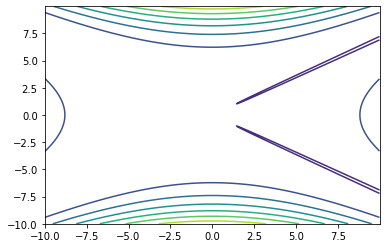

In [20]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3)+ 50*(2*Y**2 - X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

## 2.3

In [21]:
def grad_f(vector): 
    x,y = vector
    df_dx = -3*x**2 + 100*x -200*y**2
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10,learning_rate = 1):
    if starting_point is None:
        point = np.random.uniform(-5,5,size=2)
    else:
        point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point-learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

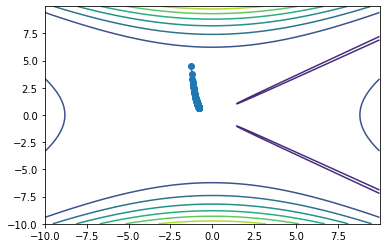

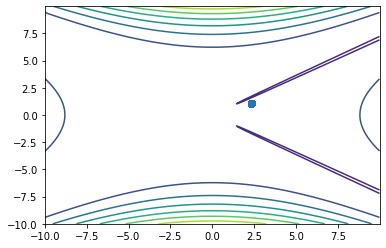

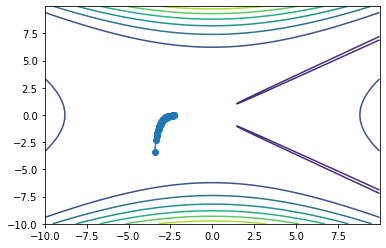

In [24]:
np.random.seed(42)
for i in [0.00001,0.00005,0.00003]:
    traj = grad_descent(iterations=100, learning_rate=i)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

## 2.4

In [27]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-5,5,size=2)
    else:
        point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations): 
        v = v*alpha + grad_f(point)*epsilon
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

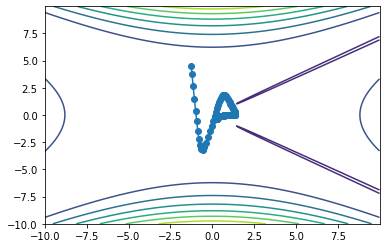

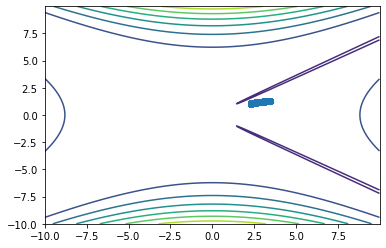

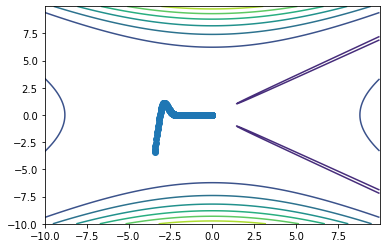

In [31]:
np.random.seed(42)
for i in [0.00001,0.0000005,0.000003]:
    traj = grad_descent_with_momentum(iterations=10000,alpha=0.9,epsilon=i)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

## 3.1

$$Set z=v_1h_1+v_2h_2+v_3h_3+v_4h_4+c$$

<h3><center>For output layer:</center></h3>

$$\frac{dL}{dc}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}$$

<h3><center>For hidden layer:</center></h3>

$$\frac{dL}{dv_{1}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}h_1$$
$$\frac{dL}{dv_{2}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}h_2$$
$$\frac{dL}{dv_{3}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}h_3$$
$$\frac{dL}{dv_{4}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}h_4$$
$$\frac{dL}{db_{1}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_1$$
$$\frac{dL}{db_{2}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_2$$
$$\frac{dL}{db_{3}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_3$$
$$\frac{dL}{db_{4}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_4$$

<h3><center>For input layer:</center></h3>

$$\frac{dL}{dw_{11}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_1x_1$$
$$\frac{dL}{dw_{12}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_2x_1$$
$$\frac{dL}{dw_{13}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_3x_1$$
$$\frac{dL}{dw_{14}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_4x_1$$
$$\frac{dL}{dw_{21}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_1x_2$$
$$\frac{dL}{dw_{22}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_2x_2$$
$$\frac{dL}{dw_{23}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_3x_2$$
$$\frac{dL}{dw_{24}}=(\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i})\frac{e^{-z}}{(1+e^{-z})^2}v_4x_2$$

## 3.2 

In [32]:
def loss(y, y_hat):
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [33]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    # forward pass
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    # backward pass
    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat) )
    
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[0,2], 
                     dL_dw[0,3], dL_dw[1,0], dL_dw[1,1], 
                     dL_dw[1,2], dL_dw[1,3], dL_db[0], 
                     dL_db[1], dL_db[2], dL_db[3], dL_dv[0], 
                     dL_dv[1], dL_dv[2], dL_dv[3], dL_dc]) / len(y) 

## 3.3

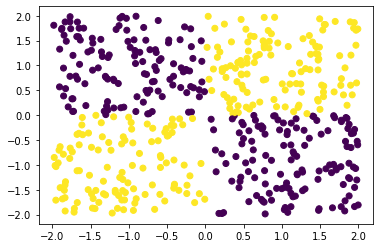

In [38]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

## 3.4

In [34]:
X = np.array([[1,0,0],[-1,-1,1]])
W = [[1, -1, 0, 1], [0, 0, .5, 1]]
b = np.array([0,0,1,0])
v = [1,0,-1,1]
c = [1]

In [35]:
start = np.array([W[0][0],W[0][1], W[0][2], W[0][3], 
                  W[1][0], W[1][1], W[1][2], W[1][3], 
                  b[0], b[1], b[2], b[3], v[0], v[1], v[2], v[3], c[0]])
def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = start
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

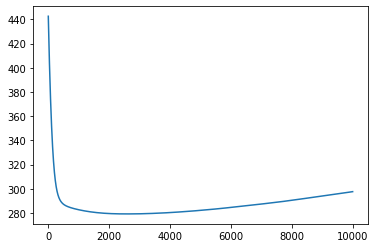

In [67]:
traj, losses = grad_descent(x, y, iterations=10000,learning_rate=5e-3)
plt.plot(losses)
plt.show()

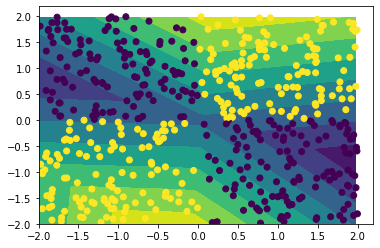

In [68]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
y_hat = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, y_hat)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

## 3.5

In [69]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size=17)

    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, *pack_params(point)))]

    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v + epsilon * grad
        point = point + v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))

    return (np.array(trajectory), losses)

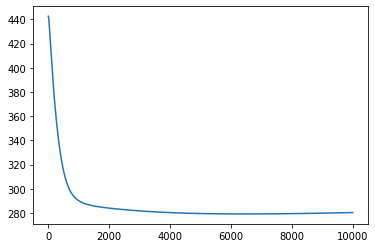

In [73]:
traj, losses = grad_descent_with_momentum(x, y, start, iterations = 10000, alpha =0.95, epsilon=0.0001)
plt.plot(losses)
plt.show()

## 3.6

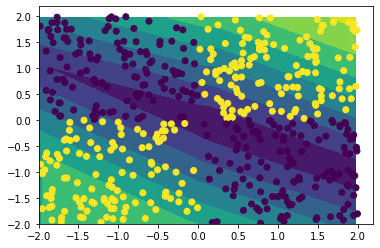

In [74]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
y_hat = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, y_hat)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()